In [44]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

In [45]:
# Read your api key environment variable
load_dotenv()
api_key = "key"

In [46]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [47]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="Bitcoin",language="en",page_size=100,sort_by="relevancy")
btc_headlines["totalResults"]

3645

In [48]:
#check sample article of Bitcoin
btc_headlines["articles"][0]

{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [49]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="Ethereum",language="en",page_size=100,sort_by="relevancy")
eth_headlines["totalResults"]


1420

In [50]:
#check sample article of Ethereum
eth_headlines["articles"][0]["content"]

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"

In [53]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []
for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)

cols = ["text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,text,compound,positive,negative,neutral
0,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.160,0.840
1,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935
2,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872
3,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.000,1.000
4,"July 15 was, at first, just another day for Pa...",0.0000,0.000,0.000,1.000


In [56]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []
for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)

cols = ["text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,text,compound,positive,negative,neutral
0,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.0,1.000
3,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [57]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.207566,0.080600,0.036200,0.883179
std,0.453018,0.069789,0.064631,0.080235
min,-0.886000,0.000000,0.000000,0.640000
25%,0.000000,0.000000,0.000000,0.831000
50%,0.381800,0.090000,0.000000,0.910000
75%,0.507000,0.104000,0.060000,0.913500
max,0.923100,0.326000,0.303000,1.000000


In [58]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.172582,0.073347,0.032495,0.894147
std,0.388969,0.072248,0.062489,0.091688
min,-0.910000,0.000000,0.000000,0.607000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.177900,0.068000,0.000000,0.909000
75%,0.493900,0.118500,0.056500,1.000000
max,0.851900,0.311000,0.347000,1.000000


### Questions:
Q: Which coin had the highest mean positive score?

A: Bitcoin has higher average positive score (0.077564>0.068011).

Q: Which coin had the highest compound score?

A: Maximum of comcpound score is greater in Bitcoin(0.923100>0.851900).

Q. Which coin had the highest positive score?

A: Maximum of positive score is greater in Bitcoin(0.32600>0.311000).

## Tokenizer

In [59]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [60]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [61]:
btc_sentiments = []
btc_tokens_corpus = []
for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        article_tokens = tokenizer(text)
        
        btc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "tokens": article_tokens
        })
        btc_tokens_corpus.append(article_tokens)
        
    except AttributeError:
        pass
btc_df = pd.DataFrame(btc_sentiments)
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.6908,0.160,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ..."
2,-0.5267,0.128,0.872,0.000,A US district judge has sentenced a UK Nationa...,"[us, district, judge, ha, sentenced, uk, natio..."
3,0.0000,0.000,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
4,0.0000,0.000,1.000,0.000,"July 15 was, at first, just another day for Pa...","[july, wa, first, another, day, parag, agrawal..."


In [64]:
# Create a new tokens column for bitcoin
eth_sentiments = []
eth_tokens_corpus = []
for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        article_tokens = tokenizer(text)
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "tokens": article_tokens
        })
        eth_tokens_corpus.append(article_tokens)
    except AttributeError:
        pass
eth_df = pd.DataFrame(eth_sentiments)
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."


## NGRAMS & Frequency Analysis

In [65]:
from collections import Counter
from nltk import ngrams

In [66]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = ngrams(tokenizer(btc_df.text.str.cat()), n=2)
Counter(btc_bigram_counts).most_common(20)

[(('satoshi', 'nakaboto'), 44),
 (('charsour', 'robot'), 22),
 (('robot', 'colleague'), 22),
 (('colleague', 'satoshi'), 22),
 (('nakaboto', 'writes'), 22),
 (('writes', 'bitcoin'), 22),
 (('every', 'fucking'), 22),
 (('fucking', 'daywelcome'), 22),
 (('daywelcome', 'another'), 22),
 (('another', 'edition'), 22),
 (('edition', 'bitcoin'), 22),
 (('bitcoin', 'today'), 22),
 (('today', 'satoshi'), 22),
 (('nakaboto', 'tell'), 22),
 (('tell', 'whats'), 22),
 (('whats', 'going'), 22),
 (('going', 'bitcoin'), 22),
 (('bitcoin', 'charsour'), 20),
 (('bitcoin', 'btc'), 19),
 (('btc', 'every'), 19)]

In [67]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [68]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(btc_df.text.str.cat()))

[('bitcoin', 93),
 ('satoshi', 44),
 ('nakaboto', 44),
 ('every', 25),
 ('another', 24),
 ('today', 24),
 ('going', 24),
 ('edition', 23),
 ('charsour', 22),
 ('robot', 22)]

In [69]:
# Get the top 10 words for Ethereum
token_count(tokenizer(eth_df.text.str.cat()))

[('ethereum', 51),
 ('ha', 31),
 ('blockchain', 25),
 ('bitcoin', 23),
 ('defi', 16),
 ('cryptocurrency', 14),
 ('decentralized', 13),
 ('finance', 11),
 ('btc', 11),
 ('crypto', 11)]

## Wordclouds

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

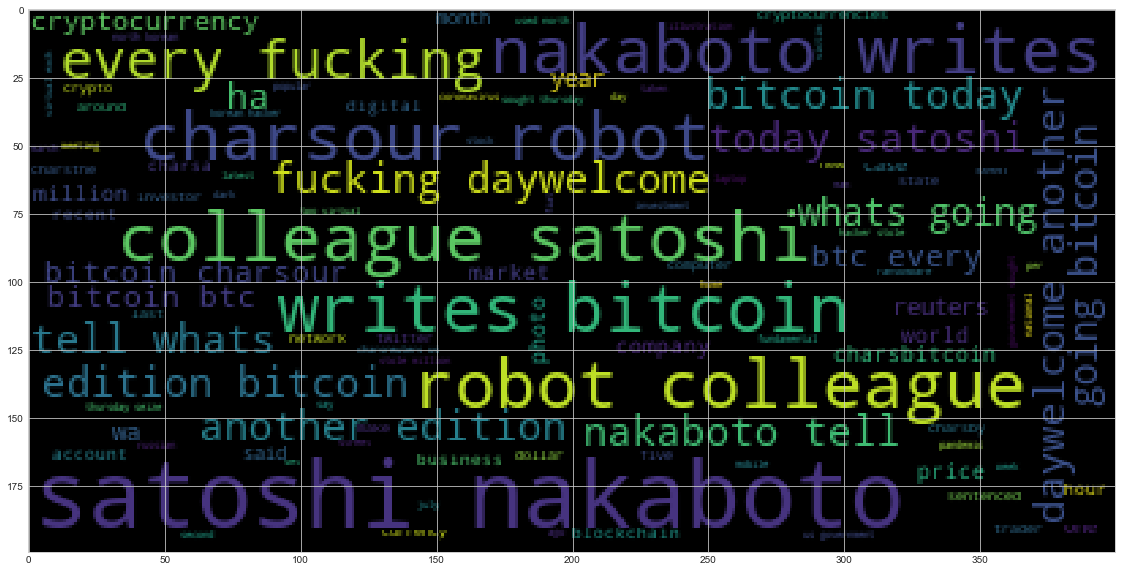

In [71]:
# Generate the Bitcoin word cloud
big_string = ' '.join(tokenizer(btc_df.text.str.cat()))
wc = WordCloud().generate(big_string)
plt.imshow(wc)

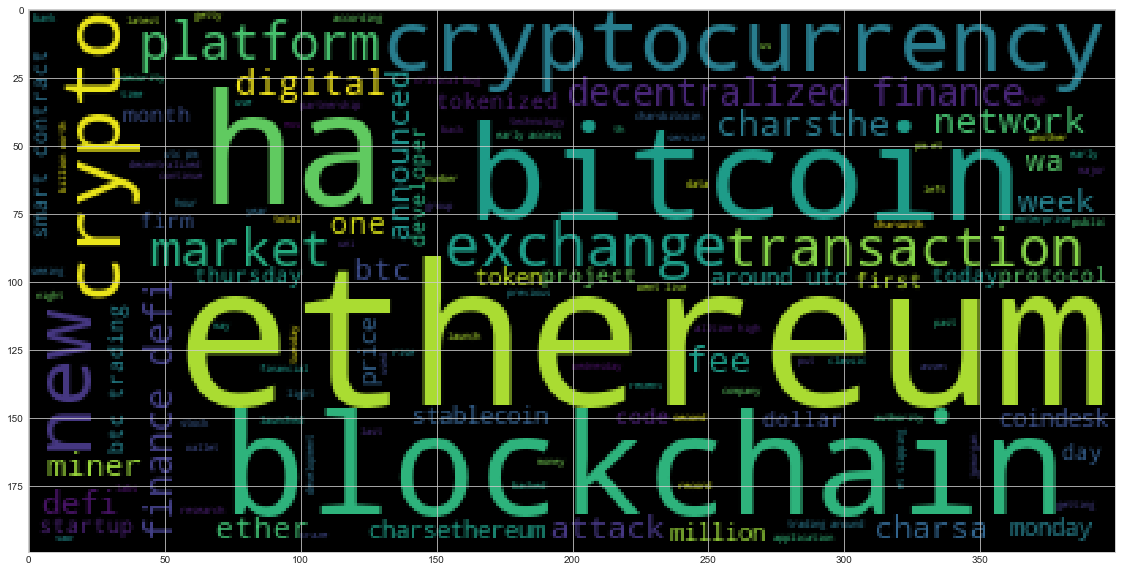

In [72]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(tokenizer(eth_df.text.str.cat()))
wc = WordCloud().generate(big_string)
plt.imshow(wc)

## Named entity recognition

In [73]:
import spacy
from spacy import displacy

In [74]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

### Bitcoin NER

In [76]:
# Concatenate all of the bitcoin text together
btc_articles = ' '.join(tokenizer(btc_df.text.str.cat()))

In [79]:
# Run the NER processor on all of the text
doc = nlp(btc_articles)

In [80]:
# Render the visualization
displacy.render(doc, style='ent')

In [81]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

two CARDINAL
singapore GPE
singapore GPE
chandler guo PERSON
us GPE
uk GPE
five year DATE
nathan wyatt wa extrad PERSON
charsby PERSON
akwagyiram tom wilson PERSON
monthly DATE
africa LOC
year DATE
south africa GPE
kenya GPE
four month ago DATE
reuters ORG
four month ago DATE
satoshi nakaboto ORG
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
today DATE
today DATE
today DATE
bitcoin charsftx cryptocurrency exchange ORG
app ORG
million CARDINAL
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitcoin GPE
bitcoin GPE
today DATE
bitc

### Ethereum NER

In [82]:
# Concatenate all of the bitcoin text together
eth_articles = ' '.join(tokenizer(eth_df.text.str.cat()))

In [83]:
# Run the NER processor on all of the text
doc = nlp(eth_articles)

In [84]:
# Render the visualization
displacy.render(doc, style='ent')

In [85]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

past couple year DATE
charsseptember min readopinions ORG
five year ago DATE
charslondon reuters ORG
jpmorgan chase amp cos jpmn ORG
marquee NORP
tuesday DATE
dea charstldr training ORG
handson PERSON
chandler guo PERSON
independe charsi PERSON
sec ORG
fiat ORG
yesterday DATE
fiat ORG
yeari ORG
satoshi nakaboto ORG
bitcoin GPE
bitcoin GPE
today DATE
second ORDINAL
one CARDINAL
last hour TIME
million CARDINAL
deloitte kpmg fidelity ORG
uni ORG
september DATE
getty imagesuniswap PERSON
charspoland photo illustration ethereum ORG
getty imagessopa PERSON
twenty dollar MONEY
bitcoin GPE
bitcoin GPE
september DATE
night TIME
mm PERSON
second ORDINAL
last spring DATE
performan charsseptember min readopinions PERSON
past month DATE
charsover billion MONEY
bitcoin GPE
bitcoin btc GPE
thursday DATE
january DATE
microsoft consensysamd PERSON
us GPE
roadmap GPE
hammerthe PERSON
prospect ORG
discus PERSON
christine kim PERSON
danny ryan liz steininger PERSON
digital cryptocurrency exchangeeuropean 

In [ ]:
# FIN